<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sun May 26 12:09:06 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P3             26W /   55W |       0MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchmetrics import Accuracy
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

C:\Users\agnie\anaconda3\envs\torch_gpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.3.0


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Currently, computer vision is used in many areas in industry, eg: 
- medicine: navigation of medical tools;
- automotive: support for drivers: recognition of others cars, pedestrians etc;
- fitness and sports: self-tracking system helping to exercise correctly
- education, ecommerce, agriculture etc.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is a phenomenon in machine learning, when the model is too fitted to training data, and it loses the ability to generalize (= achieving satisfying results on testing data).

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

There are many possible ways of preventing overfitting in machine learning. The most common are:
- use more training data - when a model is trained on a larger dataset, it can learn a broader range of patterns, making it less likely to memorize the noise or specific quirks of a smaller dataset
- use regularizations - regularization techniques add a penalty to the loss function used to train the model, discouraging overly complex models that may overfit the training data. The most common regularizations are: L1, L2 and Dropout layern. 
- use less complex model (= simplify it) - simplifying the model involves reducing the number of parameters or features. This can be achieved by: reducing the number of features (like hidden neurons) or chosing a simpler model architecture. Simpler models are less likely to capture noise and overfit, as they have a lower capacity to model complex patterns in the data.
- use data augmentation - data augmentation involves artificially increasing the size of the training dataset by creating modified versions of existing data points. This is especially common in image processing, where techniques such as rotation, scaling, flipping, and cropping are used to create new training samples. 
- use early stopping - it pauses the training phase before the machine learning model learns the noise in the data

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Here are a few reasons why the later layers in a CNN see more of the image than the earlier layers:
- Hierarchical feature learning: CNNs are designed to learn hierarchical representations of features in an image. The early layers of a CNN learn low-level features such as edges and textures, while the deeper layers learn high-level features such as shapes and objects. By gradually increasing the receptive field of the neurons in the network, the later layers can capture more global information and context about the image, which is essential for making accurate predictions.
- Spatial hierarchy: In an image, local features (such as edges and corners) are combined to form more complex patterns and objects at higher levels of abstraction. By increasing the receptive field of the neurons in the later layers, the network can capture these spatial hierarchies and relationships between different parts of the image, leading to better representation learning.
- Downsampling: Pooling layers are often used in CNNs to downsample the feature maps and reduce the spatial dimensions while retaining important features. As the network progresses through the layers, the spatial dimensions of the feature maps decrease due to the pooling operations, allowing the later layers to have a broader view of the input image.
- Translation invariance: By allowing the later layers to have a larger receptive field, the network can achieve translation invariance, which means that the network's predictions are not sensitive to small translations in the input image. This property is crucial for tasks such as object recognition, where the position of an object in the image should not affect the network's ability to recognize it.

In summary, the design of CNNs with increasing receptive fields in the later layers helps the network learn hierarchical representations of features, capture spatial hierarchies in the input image, downsample the feature maps for efficiency, and achieve translation invariance, all of which contribute to the network's ability to effectively learn and recognize patterns in images.

Source: https://www.quora.com/In-a-CNN-why-do-the-later-layers-see-more-of-the-image-than-the-earlier-layers-Shouldnt-it-be-the-other-way-around

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
# Setup training data
train_data = datasets.MNIST(
                            root="data", 
                            train=True, 
                            download=True, 
                            transform=ToTensor(), 
                            target_transform=None 
)

# Setup testing data
test_data = datasets.MNIST(
                            root="data",
                            train=False, 
                            download=True,
                            transform=ToTensor()
)

In [3]:
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))

class_names = train_data.classes
print(class_names)

60000 60000 10000 10000
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## 6. Visualize at least 5 different samples of the MNIST training dataset.

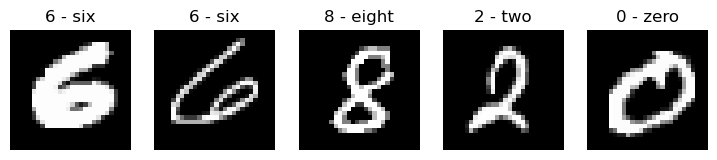

In [5]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 1, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [4]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True 
)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False 
)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001D237A0B230>, <torch.utils.data.dataloader.DataLoader object at 0x000001D237A18470>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [7]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [5]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
                                    nn.Conv2d(in_channels=input_shape, 
                                              out_channels=hidden_units, 
                                              kernel_size=3, 
                                              stride=1, 
                                              padding=1),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=hidden_units, 
                                              out_channels=hidden_units,
                                              kernel_size=3,
                                              stride=1,
                                              padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,
                                                 stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
                                    nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
                                    nn.ReLU(),
                                    nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
                                        nn.Flatten(),
                                        nn.Linear(in_features=hidden_units*7*7, 
                                                  out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        
        return x

torch.manual_seed(42)
model0_gpu = TinyVGG(input_shape=1, 
                      hidden_units=10, 
                      output_shape=len(class_names)).to(device)
print(model0_gpu)

torch.manual_seed(42)
model0_cpu = TinyVGG(input_shape=1, 
                      hidden_units=10, 
                      output_shape=len(class_names))
print(model0_cpu)

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)
TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, paddin

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [6]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [7]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # train_acc += accuracy_fn(y_true=y,
        #                          y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels
        train_acc += accuracy_fn(y_pred.argmax(dim=1), 
                                 y) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            # test_acc += accuracy_fn(y_true=y,
            #                         y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            test_acc += accuracy_fn(test_pred.argmax(dim=1),
                                    y)
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [8]:
torch.manual_seed(42)

device = "cpu"

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

accuracy_fn = Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model0_cpu.parameters(), lr=0.1)

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
                            model=model0_cpu, 
                            loss_fn=loss_fn,
                            optimizer=optimizer,
                            accuracy_fn=accuracy_fn, 
                            device = device)
    test_step(data_loader=test_dataloader,
                            model=model0_cpu,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn, 
                            device = device)

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.30087 | Train accuracy: 0.90%
Test loss: 0.06981 | Test accuracy: 0.98%



 20%|██        | 1/5 [08:29<33:56, 509.04s/it]

Epoch: 1
---------
Train loss: 0.07938 | Train accuracy: 0.98%
Test loss: 0.05678 | Test accuracy: 0.98%



 40%|████      | 2/5 [15:48<23:24, 468.28s/it]

Epoch: 2
---------
Train loss: 0.06120 | Train accuracy: 0.98%
Test loss: 0.05372 | Test accuracy: 0.98%



 60%|██████    | 3/5 [24:13<16:09, 484.88s/it]

Epoch: 3
---------
Train loss: 0.05311 | Train accuracy: 0.98%
Test loss: 0.04937 | Test accuracy: 0.98%



 80%|████████  | 4/5 [30:51<07:30, 450.62s/it]

Epoch: 4
---------
Train loss: 0.04640 | Train accuracy: 0.99%
Test loss: 0.04384 | Test accuracy: 0.98%



100%|██████████| 5/5 [46:25<00:00, 557.13s/it]


Train time on cpu: 2785.854 seconds


In [22]:
torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

accuracy_fn = Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model0_gpu.parameters(), lr=0.1)

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
                            model=model0_gpu, 
                            loss_fn=loss_fn,
                            optimizer=optimizer,
                            accuracy_fn=accuracy_fn,
                            device = device)
    test_step(data_loader=test_dataloader,
                            model=model0_gpu,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

cuda


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.28221 | Train accuracy: 0.91%
Test loss: 0.06469 | Test accuracy: 0.98%



 20%|██        | 1/5 [00:15<01:00, 15.17s/it]

Epoch: 1
---------
Train loss: 0.07446 | Train accuracy: 0.98%
Test loss: 0.04805 | Test accuracy: 0.98%



 40%|████      | 2/5 [00:49<01:18, 26.23s/it]

Epoch: 2
---------
Train loss: 0.05457 | Train accuracy: 0.98%
Test loss: 0.05122 | Test accuracy: 0.98%



 60%|██████    | 3/5 [01:25<01:01, 30.71s/it]

Epoch: 3
---------
Train loss: 0.04629 | Train accuracy: 0.98%
Test loss: 0.04949 | Test accuracy: 0.98%



 80%|████████  | 4/5 [02:00<00:32, 32.43s/it]

Epoch: 4
---------
Train loss: 0.03960 | Train accuracy: 0.99%
Test loss: 0.03645 | Test accuracy: 0.99%



100%|██████████| 5/5 [02:34<00:00, 30.96s/it]


Train time on cuda: 156.026 seconds


# Conclusion
Using GPU causes the dramatically degrease of training time:
- cpu: 2785 seconds
- gpu: 156 seconds

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

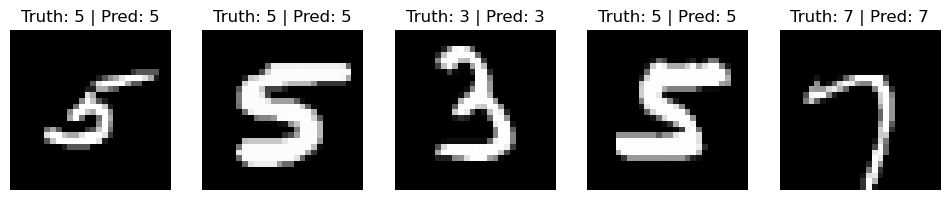

In [29]:
torch.manual_seed(42)
fig = plt.figure(figsize=(12, 12))
rows, cols = 1, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(test_data), size=[1]).item()
    img, label = test_data[random_idx]
    fig.add_subplot(rows, cols, i)
    model_pred_logits = model0_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [31]:
model0_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model0_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

313it [00:02, 125.17it/s]


10000

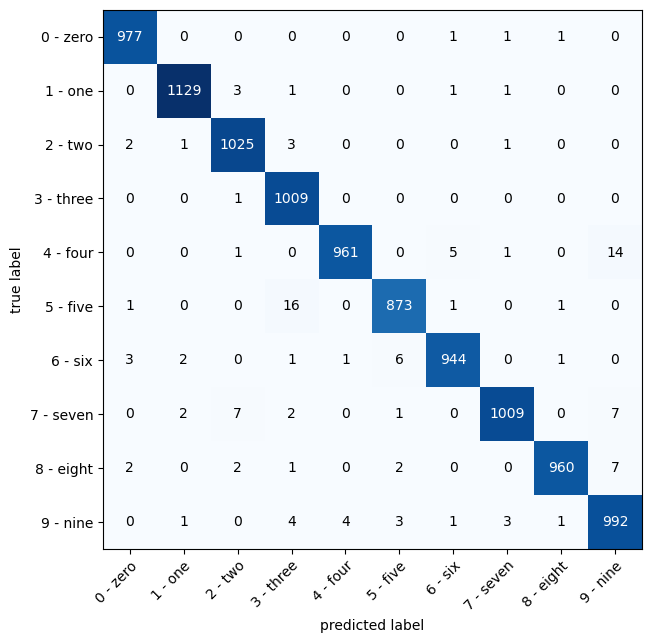

In [32]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [41]:
input_tensor = torch.rand([1,3,64,64])
print(input_tensor.shape)

kernels = [1,3,5,7,9,11]
for ker in kernels:
    conv_layer = nn.Conv2d(in_channels=3,
                           out_channels=64,
                           kernel_size=ker,
                           stride=1,
                           padding=1)

    print(f"Kernel size - {ker}")
    print(f"Random tensor original shape: {input_tensor.shape}")
    random_tensor_through_conv_layer = conv_layer(input_tensor)
    print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}\n")

torch.Size([1, 3, 64, 64])
Kernel size - 1
Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 66, 66])

Kernel size - 3
Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 64, 64])

Kernel size - 5
Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 62, 62])

Kernel size - 7
Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 60, 60])

Kernel size - 9
Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 58, 58])

Kernel size - 11
Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 56, 56])



Kernel size hyperparameter has impact on the shape of output tensor. Kernel size should be an odd number > 3. With knowledge about the value of hyperparameters, it is easy to calculate te shape of output tensor. 

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?